# Programming Exercise 1 part 2 - Multivariate Linear Regression


[Linear regression with one variable](#Linear-regression-with-one-variable)
  - [Feature normalization](#Question-1-:-Feature-normalization)
  - [Cost Computation](#Question-2-:-Cost-Computation)
  - [Gradient Descent](#Question-3-:-Gradient-Descent)
  - [Prediction](#Question-4-:-Predict-Price)
  - [Normal Equation](#Question-5-:-Normal-Equation)
  - [Use Scikit-learn](#Question-6-:-Use-Scikit-learn)

In [147]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d, Axes3D

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

Load data : here the data is the price of a house as a function of area and number of rooms

In [99]:
data = np.loadtxt('data/ex1data2.txt', delimiter=',')


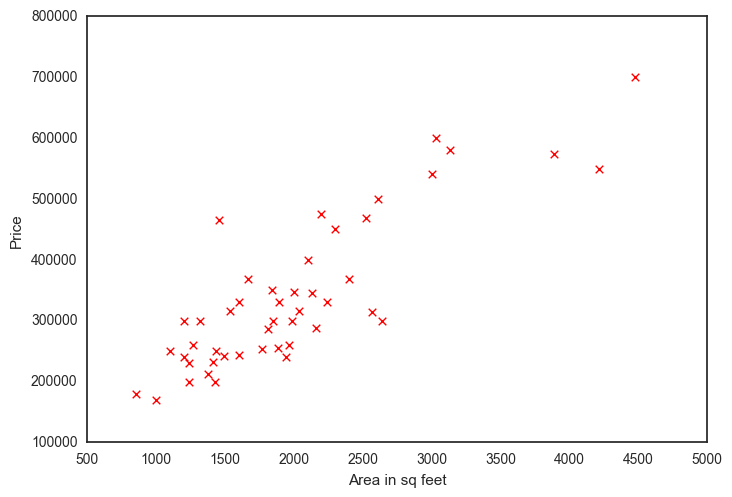

In [152]:
# FIXME this is only plotting price / area

plt.scatter(data[:,0:1], data[:,2], s=30, c='r', marker='x', linewidths=1)
# plt.xlim(4,24)
plt.xlabel('Area in sq feet');
#plt.ylabel('Nb of Room');
plt.ylabel('Price');


### Question 1 : Feature normalization
From now on, all calculus have to be vectorized. The algorithm you're writing should be working for any dataset size.

In [41]:
def featureNormalize(X):
    X_norm = X;
    mu = np.zeros(X.shape)
    sigma = np.zeros(X.shape)
    # your code here
    mu = np.mean(X, axis=0)
    # We use ddof = 1 in order to obtain exact same results as in octave/matlab
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu)/(sigma);
    
    return X_norm, mu, sigma;

In [42]:
# X = np.c_[data[:,0:2]]
y = np.c_[data[:,2]]

X, mu, sigma = featureNormalize(data[:,0:2])
X = np.c_[np.ones(data.shape[0]),X]

### Question 2 : Cost Computation

$$ J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)} )^{2} $$

In [80]:
def computeCostMulti(X, y, theta):
    J = 0.0;
    # your code here. Code have to be vecorized and have to work with any dataset size
    m = y.size
    J = 0
    h = X.dot(theta)
    J = np.sum(np.square(h-y))/(2*m)
    return J;

In [84]:
# compute initial cost and init theta
theta = np.zeros(( X.shape[1], 1) )
print theta
J = computeCostMulti(X, y, theta);
print "Initial Error is :",  J
print "Initial Error Should around 65591548106"

[[ 0.]
 [ 0.]
 [ 0.]]
Initial Error is : 65591548106.5
Initial Error Should around 65591548106


### Question 3 : Gradient Descent
Repeat until convergence :
$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \text{,  for j := 0...n} $$

In [85]:
def gradientDescentMulti(X, y, theta=np.array([[0],[0], [0]]), alpha=0.1, num_iters=50):
    J_hist = np.zeros(num_iters)
    
    m = y.size
    J_hist = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = 0;
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
        J_hist[iter] = computeCostMulti(X, y, theta)
    
    return theta, J_hist

##### Understanding learning rate and normalization :
When learning works fine then
- try to play with alpha and see the influence of changing it
- try to disable feature normalization and observe what happens

theta:
[[ 340412.65957447]
 [ 110631.05026267]
 [  -6649.47425464]]


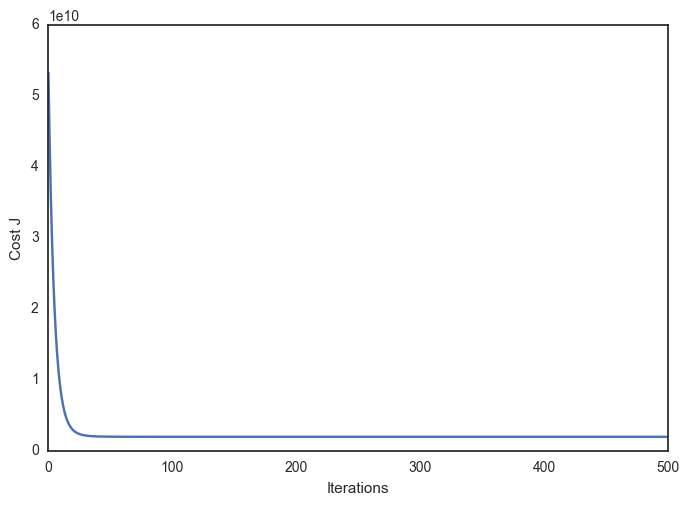

In [93]:
# call gradient descent
theta , Cost_J = gradientDescentMulti(X, y, alpha = 0.1, num_iters=500)
print 'theta:\n',theta

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

### Question 4 : Predict Price
Here you have to estimate the price of 1650 sq-ft house.
If everything is fine the estimated price should be : FIXME

In [87]:
# Estimate the price of a 1650 sq-ft, 3 br house
# hint : do not forget to normalize the input vector
house = [1650, 3]
# YOUR CODE HERE
house = (house - mu) / sigma;
house = np.concatenate(([1.0], house), axis=0)
pred = theta.transpose().dot(house)
print "Predicted Price is : ", pred[0]

Predicted Price is :  292748.085232


### Question 5 : Normal Equation

With the normal equation $\theta = (X^T X)^{-1}X^T y$

If everything is fine, then result should be similar to what we obtained previously.

In [88]:
def normalEq(X, y):
    # YOUR CODE HERE
    temp1 = X.transpose().dot(X)
    temp2 = X.transpose().dot(y)
    
    theta_eq = np.linalg.pinv(temp1).dot(temp2)
    return theta_eq

In [98]:
# Call
theta_eq = normalEq(X, y)


# YOUR CODE HERE
print "theta_eq : \n", theta_eq
pred = theta_eq.transpose().dot(house)
print "Predicted Price is : ", pred[0]

print "Difference between two thetas is : \n", theta - theta_eq

theta_eq : 
[[ 340412.65957447]
 [ 110631.05027885]
 [  -6649.47427082]]
Predicted Price is :  293081.464335
Difference between two thetas is : 
[[ -2.32830644e-10]
 [ -1.61788921e-05]
 [  1.61789712e-05]]


### Question 6 : Use Scikit-learn (not in original coursera exercise)
Now you should use scikit-learn to do the linear regression.
If everything is fine, then result should be similar to what we obtained previously.

In [90]:
# Compare with Scikit-learn Linear regression 
# YOUR CODE HERE
regr = LinearRegression()
regr.fit(X[:,1:3], y)

# keep this part
theta_sckit = np.c_[regr.intercept_, regr.coef_].transpose()

print "theta_sckit : \n", theta_sckit



theta_sckit : 
[[ 340412.65957447]
 [ 110631.05027885]
 [  -6649.47427082]]


#### Surface learned

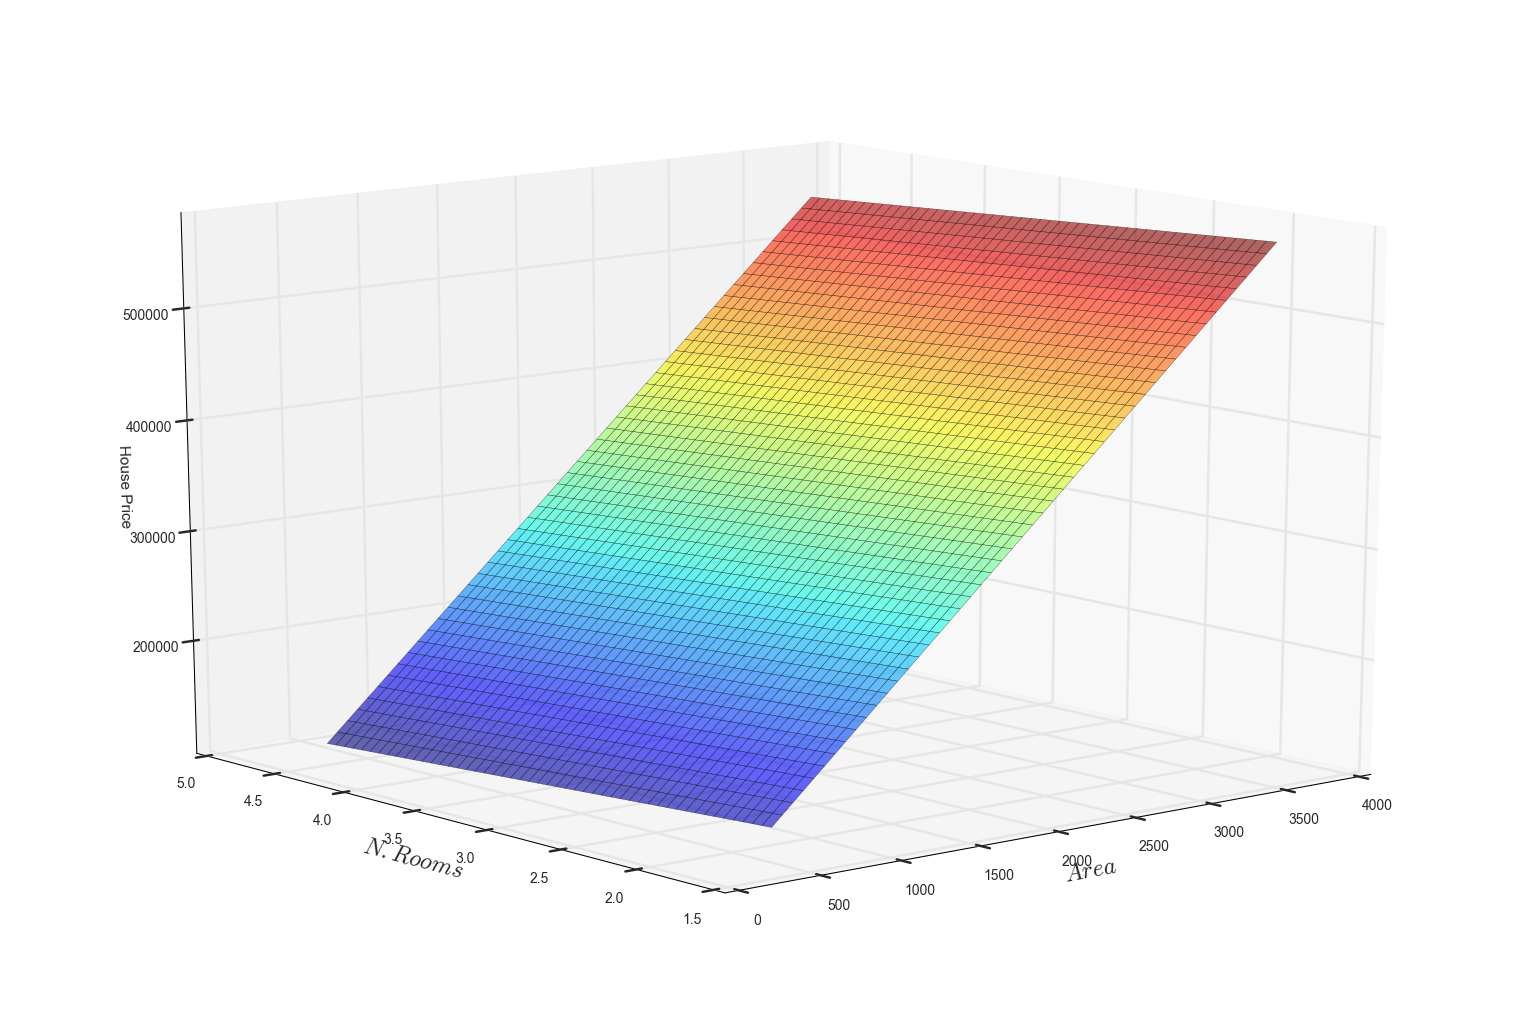

In [148]:

# Create grid coordinates for plotting
B0 = np.linspace(mu[0]-2*sigma[0], mu[0]+2*sigma[0], 50)
B1 = np.linspace(mu[1]-2*sigma[1], mu[1]+2*sigma[1], 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')

xx_norm = (xx - mu[0]) / sigma[0]
yy_norm = (yy - mu[1]) / sigma[1]

Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    pt = np.array([[1], [xx_norm[i,j]], [yy_norm[i,j]]]);
    Z[i,j] = pt.T.dot(theta_sckit.T)

fig = plt.figure(figsize=(15,10))
# ax2 = fig.add_subplot(111, projection='3d')
ax2 = Axes3D(fig)

ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('House Price')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$Area$', fontsize=17)
    ax.set_ylabel(r'$N. Rooms$', fontsize=17)
